# Zeitdiskrete Systeme im Frequenzbereich
This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing hosted @ https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

(c) 2016, 2017 Prof. Dr. Christian Münker 

In [22]:
from __future__ import print_function, division
%matplotlib inline
from IPython.core.display import Image, display
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
#import my_dsp_lib_v2 as dsp
imgpath = 'img/'
FigSize = (10,5) # size of figures in inches

<!-- example for static HTML image embedded in MarkDown
![Menschen und Python](http://imgs.xkcd.com/comics/reassuring.png) 
MarkDown allows no alignment and scaling, but HTML/CSS does: 

<p style="text-align:center; font-weight:bold">
<img src="http://imgs.xkcd.com/comics/reassuring.png" />
<br />Python macht glücklich ...
</p>-->

In diesem Kapitel betrachten wir zunächst das System zur Verarbeitung von zeitdiskreten Sensorsignalen im Frequenzbereich.


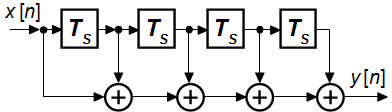

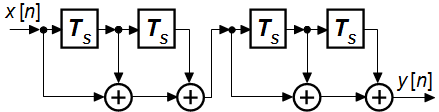

In [23]:
display(Image(filename = imgpath + 'ueb-LTI-MA.png'))
display(Image(filename = imgpath + 'ueb-LTI-kask_MA.png'))


In [24]:
# Define Signal and Filter
Ts = 1/200.0     # sampling period
fsig = 50.0      # signal frequency
phi0  = 0        # signal initial phase
tstep = 1e-3     # time step for "analog" signal
Tmax = 6.0/fsig  # timespan for 6 signal periods 
N_Ts = Tmax / Ts # number of samples in Tmax
# -- Calculate time-vectors and input signals ---
n = np.arange(0,round(N_Ts)) # sample n (start,stop,step)
t = np.arange(0,Tmax,tstep)  # time t
xn = 1.5 + 0.5*np.cos(2.0*np.pi*fsig*n*Ts + phi0) # x[n]
xt = 1.5 + 0.5*np.cos(2.0*np.pi*fsig*t + phi0) # x(t).

b = np.ones(4); a = 1 # MA-filter, N = 5
#b = np.convolve([1,1,1],[1,1,1]); a = 1 
#b = [1, 0]; a = [1, -0.9] # lossy integrator

## Signal im Zeitbereich

  n :    0    1    2    3    4    5    6    7
x[n]: 2.00 1.50 1.00 1.50 2.00 1.50 1.00 1.50

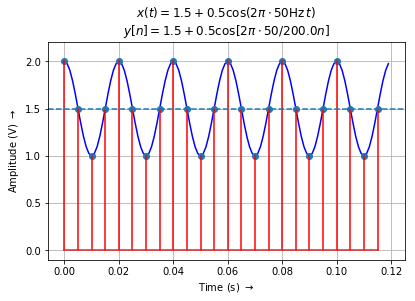

In [25]:
plt.figure() 
plt.xlabel(r'Time (s) $\rightarrow$')
plt.ylabel(r'Amplitude (V) $\rightarrow$')
plt.title('$x(t) = 1.5 + 0.5 \cos(2 \pi \cdot 50 \mathrm{Hz}\, t)$\n\
$y[n] = 1.5 + 0.5 \cos[2 \pi \cdot 50 / %.1f n]$'%(1./Ts))
#
plt.grid(True)    # Turn on grid
plt.plot(t, xt, 'b-') # x(t) with blue line
plt.stem(n*Ts, xn, linefmt='r-') # x[n], red stems
plt.ylim(-0.1, 2.2)   # set y-limits to ymin, ymax
# horizontal line (relative x-coordinates):
plt.axhline(1.5, xmin=0, xmax=1, linestyle='--') 
plt.subplots_adjust(top=0.88,right=0.95)
print('  n :', end="")
for i in range(8): print('{:5d}'.format(i), end="")
print('\nx[n]:', end="")
for i in range(8): print('{0:5.2f}'.format(xn[i]),
               end="")

## Gefiltertes Signal im Zeitbereich

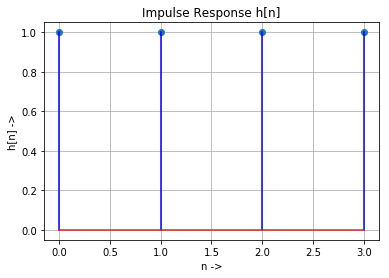

In [26]:
plt.figure(); plt.grid(True)
h = b # Impulse response = coefficients for FIR filters
plt.stem(range(len(h)), h, 'b-') # plot h[n]
plt.xlabel('n ->'); plt.ylabel('h[n] ->');
plt.title('Impulse Response h[n]');

## Impulsantwort des Filters


y[n]: 0.50 0.88 1.12 1.50 1.50 1.50 1.50 1.50

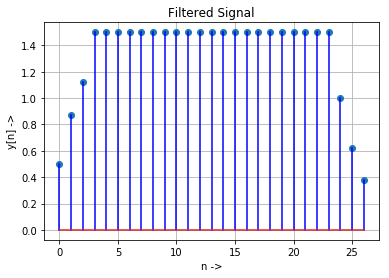

In [31]:
plt.figure(); plt.grid(True)
yn = np.convolve(xn,h)/4. # convolve & scale
print('\ny[n]:', end="")
for i in range(8): print('{0:5.2f}'.format(yn[i]),
               end="")
plt.stem(range(len(yn)), yn, 'b') # y[n]
plt.xlabel('n ->'); plt.ylabel('y[n] ->')
plt.title('Filtered Signal');

## Pol- und Nullstellendiagramm
Zunächst stellen wir das Pol-/Nullstellendiagramm des Filter dar:

NameError: name 'dsp' is not defined

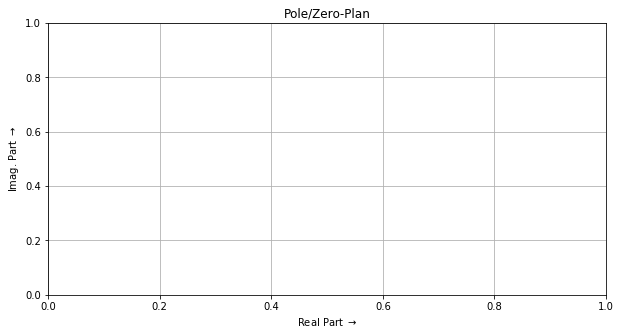

In [30]:
# ----- P/Z-Plot -----
plt.figure(figsize=(FigSize[0],FigSize[1])); plt.clf(); plt.grid(True) 
plt.xlabel(r'Real Part $\rightarrow$'); plt.ylabel(r'Imag. Part $\rightarrow$')
plt.title('Pole/Zero-Plan')
dsp.zplane(b,a)

##Betragsfrequenzgang
Als nächstes schauen wir uns den Betragsfrequenzgang an:

In [ ]:
# ----- frequency response -----
figure(figsize=(FigSize[0],FigSize[1])); clf(); grid(True)
[W, H] = sig.freqz(b, a, whole=0);
f = W  / (Ts * 2 * pi)
plot(f,abs(H))
ylabel(r'$|H(e^{j \Omega})| \rightarrow$')
title('Frequency Response')


**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2017*.

The latest version of this notebook can be found at

[https://github.com/chipmuenk/dsp_fpga/blob/master/notebooks/02_LTI/dsvFPGA-LTI_F.ipynb](https://github.com/chipmuenk/dsp_fpga/blob/master/notebooks/02_LTI/dsvFPGA-LTI_F.ipynb)